# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
temps=[]
hum=[]
clouds=[]
wind=[]
lats=[]
lngs=[]
countries=[]
dates=[]
new_cities=[]

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="
for city in cities:
    query_url=url+city
    try:
        response=requests.get(query_url).json()
        temps.append(response['main']['temp_max'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
        
    except KeyError:
        print(f"{city} not found")


sentyabrskiy not found
vaitupu not found
grand river south east not found
nizhneyansk not found
belushya guba not found
barentsburg not found
taolanaro not found
illoqqortoormiut not found
saleaula not found
tsihombe not found
karamea not found
stoyba not found
kerteh not found
gorno-chuyskiy not found
attawapiskat not found
amderma not found
palabuhanratu not found
tunduru not found
cagayan de tawi-tawi not found
anar darreh not found
belogradcik not found
hihifo not found
yomitan not found
mankovo-kalitvenskoye not found
sataua not found
rungata not found
mys shmidta not found
jabiru not found
vestbygda not found
tabiauea not found
macaboboni not found
sorvag not found
aflu not found
bargal not found
jahrom not found
artyk not found
tarudant not found
tumannyy not found
bolungarvik not found
cockburn harbour not found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df=pd.DataFrame({'City':new_cities,'Max Temp':temps, 'Cloudiness':clouds, 'Latitude':lats, 'Longitude':lngs, 'Humidity':hum, 'Wind Speed':wind, "Country":countries, "Date":dates})
df

,City,Max Temp,Cloudiness,Latitude,Longitude,Humidity,Wind Speed,Country,Date
0,punta arenas,69.80,0,-53.1500,-70.9167,52,5.75,CL,1612904192
1,vila velha,78.01,90,-20.3297,-40.2925,94,5.75,BR,1612904363
2,bredasdorp,64.40,11,-34.5322,20.0403,82,2.30,ZA,1612904363
3,meulaboh,77.59,15,4.1363,96.1285,85,4.59,ID,1612904363
4,vaini,80.60,90,-21.2000,-175.2000,89,21.85,TO,1612904364
...,...,...,...,...,...,...,...,...,...
545,puerto madryn,75.31,100,-42.7692,-65.0385,34,23.76,AR,1612904516
546,mednogorsk,-19.28,62,51.4128,57.5950,87,3.53,RU,1612904517
547,bouloupari,77.00,75,-21.8667,166.0500,88,2.30,NC,1612904517
548,san policarpo,78.73,100,12.1791,125.5072,86,12.97,PH,1612904517


In [7]:
filename='cities.csv'
df.to_csv(filename,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df.loc[df['Humidity']>100]

,City,Max Temp,Cloudiness,Latitude,Longitude,Humidity,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

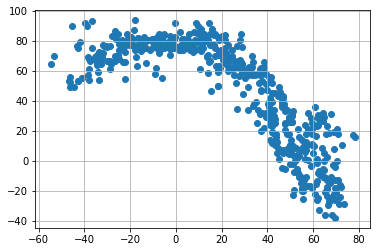

In [9]:
x_values=df['Latitude']
y_values=df['Max Temp']
plt.scatter(x_values,y_values)
plt.grid()

## Latitude vs. Humidity Plot

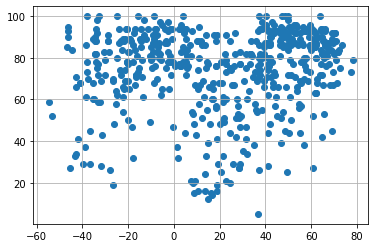

In [10]:
x_values=df['Latitude']
y_values=df['Humidity']
plt.scatter(x_values,y_values)
plt.grid()

## Latitude vs. Cloudiness Plot

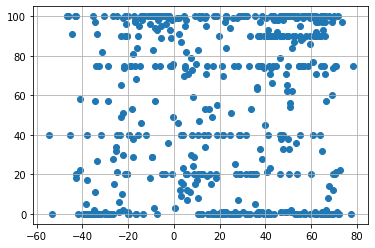

In [11]:
x_values=df['Latitude']
y_values=df['Cloudiness']
plt.scatter(x_values,y_values)
plt.grid()

## Latitude vs. Wind Speed Plot

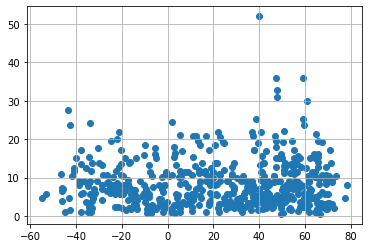

In [12]:
x_values=df['Latitude']
y_values=df['Wind Speed']
plt.scatter(x_values,y_values)
plt.grid()

## Linear Regression

In [13]:
northern_hemi=df[df['Latitude']>=0]
#x_values=northern_hemi['Latitude']
#y_values=northern_hemi['Max Temp']
southern_hemi=df[df['Latitude']<0]
#x_values=southern_hemi['Latitude']

def plot_regression(x_values,y_values,text_location):
    (slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
    predicted_y=slope*x_values+intercept
    line_equation=f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,predicted_y,c='r')
    plt.annotate(line_equation,text_location,c='r',fontsize=15)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

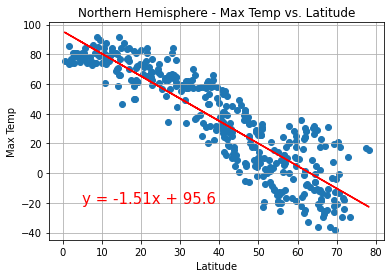

In [17]:
plot_regression(x_values=northern_hemi['Latitude'],y_values=northern_hemi['Max Temp'],text_location=(5,-20))
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.grid()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

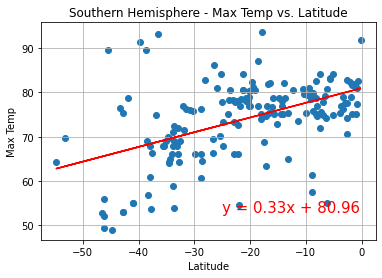

In [18]:
plot_regression(x_values=southern_hemi['Latitude'],y_values=southern_hemi['Max Temp'],text_location=(-25,53))
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.grid()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

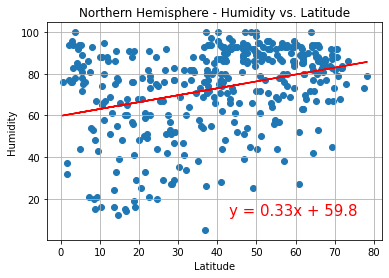

In [19]:
plot_regression(x_values=northern_hemi['Latitude'],y_values=northern_hemi['Humidity'],text_location=(43,12))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

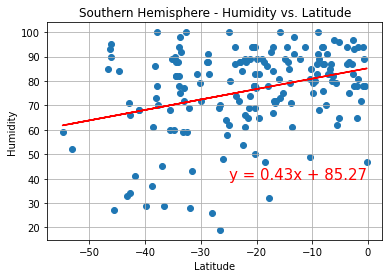

In [20]:
plot_regression(x_values=southern_hemi['Latitude'],y_values=southern_hemi['Humidity'],text_location=(-25,40))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.grid()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

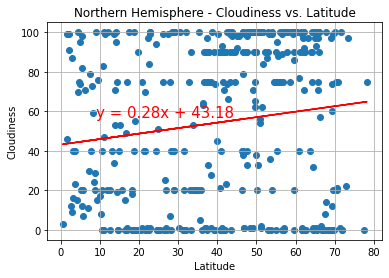

In [21]:
plot_regression(x_values=northern_hemi['Latitude'],y_values=northern_hemi['Cloudiness'],text_location=(9,57))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

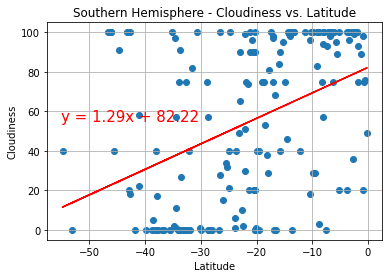

In [22]:
plot_regression(x_values=southern_hemi['Latitude'],y_values=southern_hemi['Cloudiness'],text_location=(-55,55))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.grid()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

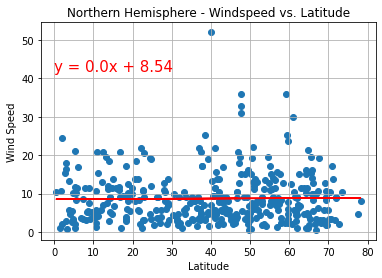

In [23]:
plot_regression(x_values=northern_hemi['Latitude'],y_values=northern_hemi['Wind Speed'],text_location=(0,42))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Windspeed vs. Latitude')
plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

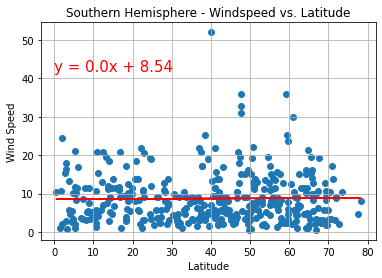

In [24]:
plot_regression(x_values=northern_hemi['Latitude'],y_values=northern_hemi['Wind Speed'],text_location=(0,42))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Windspeed vs. Latitude')
plt.grid()